<a href="https://colab.research.google.com/github/carolinagalvisl/01.01-PROYECTO-KAGGLE/blob/main/03%20-%20preprocesamiento_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

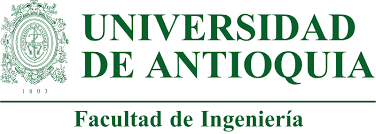

# <font color='056938'> **01.01 - PROYECTO KAGGLE - </font> <font color='8EC044'> Entrega Final "Preprocesado para el Archivo `train`"** </font>

## <font color='157699'> **Paso 1:** </font>

In [6]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

## <font color='157699'> **Paso 2: Descargar datos directamente desde Kaggle** </font>

- Se creo un archivo kaggle.jsoncon con mi token de autenticación (en kaggle $\to$ Hago clic en el icono de usuario en la parte superior derecha $\to$
ajustes $\to$ API crea un nuevo token);

- Subirlo a este espacio de trabajo del cuaderno;

- Y ejecutar la siguiente celda.

In [7]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download --force udea-ai-4-eng-20252-pruebas-saber-pro-colombia

chmod: cannot access './kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.12/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in .. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


## <font color='157699'> **Paso 3: Descomprimir e inspeccionar datos** </font>

Se descomprime el fichero.

In [8]:
!unzip udea*.zip > /dev/null

unzip:  cannot find or open udea*.zip, udea*.zip.zip or udea*.zip.ZIP.

No zipfiles found.


In [9]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185238 test.csv
   692501  10666231 143732437 train.csv
  1286075  15528571 207634348 total


## <font color='157699'> **Paso 4: Se carga `train.csv` y `test.csv` con la librería `Pandas`** </font>

In [10]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
x = pd.read_csv("test.csv")

Se muestran las primeras filas del archivo `train`.

In [11]:
z.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


Se muestra información sobre las columnas de `train`.

In [12]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 13 

## <font color='157699'> **Paso 5: Columna PERIODO_ACADEMICO** </font>

Se muestran los valores únicos de la columna PERIODO_ACADEMICO.

In [13]:
z ['PERIODO_ACADEMICO'].unique()

array([20212, 20203, 20195, 20183, 20194, 20213, 20184, 20202, 20196])

Se busca cuántas veces se repite cada valor.

In [14]:
z.PERIODO_ACADEMICO.value_counts()

,count
PERIODO_ACADEMICO,
20195,180873
20203,171838
20212,171412
20183,164818
20194,1472
20213,1178
20202,490
20184,254
20196,165


Se buscan los valores nulos.

In [15]:
z ['PERIODO_ACADEMICO'].isna().sum()

np.int64(0)

Se agrupan los periodos por años y no por semestres.

In [16]:
z ['PERIODO_ACADEMICO'] = z ['PERIODO_ACADEMICO'].astype('category')
z ['PERIODO_ACADEMICO'] = z ['PERIODO_ACADEMICO'].astype(str).str.replace(r'2018.*', '2018', regex=True)
z ['PERIODO_ACADEMICO'] = z ['PERIODO_ACADEMICO'].astype(str).str.replace(r'2019.*', '2019', regex=True)
z ['PERIODO_ACADEMICO'] = z ['PERIODO_ACADEMICO'].astype(str).str.replace(r'2020.*', '2020', regex=True)
z ['PERIODO_ACADEMICO'] = z ['PERIODO_ACADEMICO'].astype(str).str.replace(r'2021.*', '2021', regex=True)

Se muestra la columna PERIODO_ACADEMICO.

In [17]:
z ['PERIODO_ACADEMICO']

,PERIODO_ACADEMICO
0,2021
1,2021
2,2020
3,2019
4,2021
...,...
692495,2019
692496,2021
692497,2018
692498,2019


Codificación para la columna.

In [18]:
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder()
codificador = encode.fit_transform(z [['PERIODO_ACADEMICO']])
arreglo = codificador.toarray()
periodo = pd.DataFrame(arreglo, columns = encode.categories_)

Se modifica la `z`.

In [19]:
z = pd.concat([z, periodo], axis = 'columns')
z = z.drop('PERIODO_ACADEMICO', axis=1)

Se muestra la nueva `z`.

In [20]:
z.head()

,ID,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,...,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,"(2018,)","(2019,)","(2020,)","(2021,)"
0,904256,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,...,Postgrado,medio-alto,0.322,0.208,0.310,0.267,0.0,0.0,0.0,1.0
1,645256,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,...,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264,0.0,0.0,0.0,1.0
2,308367,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,...,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264,0.0,0.0,1.0,0.0
3,470353,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,...,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190,0.0,1.0,0.0,0.0
4,989032,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,...,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294,0.0,0.0,0.0,1.0


## <font color='157699'> **Paso 6: Columna E_PRGM_ACADEMICO** </font>

Cantidad de veces que se repiten los valores.

In [21]:
z ["E_PRGM_ACADEMICO"].value_counts()

,count
E_PRGM_ACADEMICO,
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
...,...
DEPORTE Y ACTIVIDADA FISICA,1
QUIMICA Y FARMACIA,1
"LICENCIATURA EN EDUCACON FISICA, RECREACION Y DEPORTES",1


Se instala la librería unidecode.

In [22]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 5.8 MB/s eta 0:00:00


Se agrupan los programas academicos para evitar duplicados por datos mal escritos.

In [23]:
from unidecode import unidecode
import re

replacements = {
    r'INGENIER\?A': 'INGENIERIA',
    r'INGENIIERIA': 'INGENIERIA',
    r'EDUCACI\?N\b': 'EDUCACION',
    r'RECREACI\?N\b': 'RECREACION',
    r'F\?SICA\b': 'FISICA',
    r'ESC\?NICAS\b': 'ESCENICAS',
    r'MATEM\?TICAS\b': 'MATEMATICAS',
    r'FILOSOF\?A\b': 'FILOSOFIA',
    r'DISE\?O\b': 'DISEÑO',
    r'DISE\?\?O\b': 'DISEÑO',
    r'COMUNICACI\?N\b': 'COMUNICACION',
    r'COMUNICACI\?\?N\b': 'COMUNICACION',
    r'GR\?\?FICA\b': 'GRAFICA',
    r'EL\?CTRICA\b': 'ELECTRICA',
    r'QU\?MICA\b': 'QUIMICA',
    r'FARMAC\?UTICA\b': 'FARMACEUTICA',
    r'ADMINISTRACI\?N\b': 'ADMINISTRACION',
    r'P\?BLICA\b': 'PUBLICA',
    r'INGL\?S\b': 'INGLES',
    r'\?NFASIS\b': 'ENFASIS',
    r'GESTI\?N\b': 'GESTION',
    r'M\?SICA\b': 'MUSICA',
    r'ECONOM\?A\b': 'ECONOMIA',
    r'GASTRONOM\?A\b': 'GASTRONOMIA',
    r'B\?SICA\b': 'BASICA',
    r'GEOLOG\?A\b': 'GEOLOGIA',
    r'PEDAGOG\?A\b': 'PEDAGOGIA',
    r'ART\?STICA\b': 'ARTISTICA',
    r'LOG\?STICA\b': 'LOGISTICA'
}

general_replacements = [
    (r'.*INGENIERIA.*', 'INGENIERIA'),
    (r'ADMINISTRACION.*', 'ADMINISTRACION'),
    (r'DISEÑO.*', 'DISEÑO'),
    (r'DISENO.*', 'DISEÑO'),
    (r'LICENCIATURA.*', 'LICENCIATURA'),
    (r'CIENCIA.*', 'CIENCIAS'),
    (r'COMUNICACION.*', 'COMUNICACION'),
    (r'GESTION.*', 'GESTION'),
    (r'FILOSOFIA.*', 'FILOSOFIA'),
    (r'QUIMICA.*', 'QUIMICA'),
    (r'NEGOCIOS.*', 'NEGOCIOS'),
    (r'.*MERCAD.*', 'MERCADEO'),
    (r'MATEMATICAS.*', 'MATEMATICAS'),
    (r'.*ARTE.*', 'ARTES'),
    (r'ESTUDIOS.*', 'ESTUDIOS'),
    (r'FINANZAS.*', 'FINANZAS'),
    (r'CONSTRUCCION.*', 'CONSTRUCCION'),
    (r'DIRECCION.*', 'DIRECCION'),
    (r'RELACIONES.*', 'RELACIONES'),
    (r'GEO.*', 'GEOGRAFIA'),
    (r'PROFESIONAL.*', 'PROFESIONAL'),
    (r'LENG.*', 'LENGUAS'),
    (r'ADMIN.*', 'ADMINISTRACION'),
    (r'.*DEPORT.*', 'DEPORTE'),
    (r'.*BIOLOGIA.*', 'BIOLOGIA'),
    (r'CINE.*', 'CINE'),
    (r'CONTADURIA.*', 'CONTADURIA'),
    (r'COMERCIO.*', 'COMERCIO'),
    (r'.*LITERA.*', 'LITERATURA'),
    (r'.*FILOL.*', 'FILOLOGIA'),
    (r'PUBLICI.*', 'PUBLICIDAD'),
    (r'MARK.*', 'MERCADEO'),
    (r'HISTORIA.*', 'HISTORIA'),
    (r'.*MUSICA.*', 'MUSICA'),
    (r'.*VETE.*', 'VETERINARIA'),
    (r'.*ZOO.*', 'VETERINARIA'),
    (r'.*GASTR.*', 'GASTRONOMIA'),
    (r'.*QUIRURGICA.*', 'MEDICINA'),
    (r'ECONO.*', 'ECONOMIA'),
    (r'GEREN.*', 'GERENCIA'),
    (r'HOTELERIA.*', 'HOTELERIA'),
    (r'.*PSICOLO.*', 'PSICOLOGIA'),
    (r'.*AGRO.*', 'AGRONOMIA')
]

def clean_text(text):
    text = unidecode(text).upper().strip()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'^PROFESIONAL EN\s+', '', text)
    for pattern, replacement in replacements.items():
        text = re.sub(pattern, replacement, text)
    for pattern, replacement in general_replacements:
        text = re.sub(pattern, replacement, text)
    return text

z ['E_PRGM_ACADEMICO'] = z ['E_PRGM_ACADEMICO'].apply(clean_text)

Se muestran los diferentes tipos de programas que hay.

In [24]:
len(z ['E_PRGM_ACADEMICO'].unique())

110

Se hacen 2 grupos con los programas más conocidos y el resto de programas.

In [25]:
programas_agrupados=['INGENIERIA','ADMINISTRACION','DISEÑO','LICENCIATURA','CIENCIAS','COMUNICACION','GESTION','FILOSOFIA','QUIMICA','NEGOCIOS','MERCADEO',
'MATEMATICAS','ARTES','ESTUDIOS','FINANZAS','CONSTRUCCION','DIRECCION','RELACIONES','GEOGRAFIA','PROFESIONAL','LENGUAS', 'DEPORTE'
'BIOLOGIA','CINE','CONTADURIA','COMERCIO','LITERATURA','FILOLOGIA','PUBLICIDAD','HISTORIA','MUSICA','VETERINARIA','GASTRONOMIA'
'MEDICINA', 'ECONOMIA','GERENCIA','HOTELERIA','PSICOLOGIA','AGRONOMIA']

programas_otros = [elem for elem in z ['E_PRGM_ACADEMICO'] if elem not in programas_agrupados]

condicion = z ['E_PRGM_ACADEMICO'].isin(programas_otros)
z.loc[condicion, 'E_PRGM_ACADEMICO'] = 'OTRAS'

Se muestran los nuevos valores de la columna.

In [26]:
z ['E_PRGM_ACADEMICO'].unique()

array(['OTRAS', 'MERCADEO', 'ADMINISTRACION', 'PSICOLOGIA', 'VETERINARIA',
       'INGENIERIA', 'HOTELERIA', 'LICENCIATURA', 'COMUNICACION',
       'CIENCIAS', 'GESTION', 'MUSICA', 'CONTADURIA', 'DISEÑO',
       'ECONOMIA', 'NEGOCIOS', 'QUIMICA', 'FINANZAS', 'RELACIONES',
       'ARTES', 'ESTUDIOS', 'CINE', 'FILOSOFIA', 'FILOLOGIA', 'GERENCIA',
       'LENGUAS', 'LITERATURA', 'AGRONOMIA', 'GEOGRAFIA', 'HISTORIA',
       'CONSTRUCCION', 'COMERCIO', 'PUBLICIDAD', 'MATEMATICAS',
       'DIRECCION', 'PROFESIONAL'], dtype=object)

Codificación de la columna.

In [27]:
encode = OneHotEncoder()
codificadorPr = encode.fit_transform(z [['E_PRGM_ACADEMICO']])
arregloPr = codificadorPr.toarray()
programa = pd.DataFrame(arregloPr,columns = encode.categories_)

Se adapta la `z`.

In [28]:
z = pd.concat([z, programa], axis = 'columns')
z = z.drop('E_PRGM_ACADEMICO', axis=1)

Se muestra la nueva `z`.

In [29]:
z.head()

,ID,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,...,"(MERCADEO,)","(MUSICA,)","(NEGOCIOS,)","(OTRAS,)","(PROFESIONAL,)","(PSICOLOGIA,)","(PUBLICIDAD,)","(QUIMICA,)","(RELACIONES,)","(VETERINARIA,)"
0,904256,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,645256,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,308367,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,470353,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,989032,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## <font color='157699'> **Paso 7: Columna E_PRGM_DEPARTAMENTO** </font>

Se muestran los valores únicos de la columna.

In [30]:
z ['E_PRGM_DEPARTAMENTO'].unique()

array(['BOGOTÁ', 'ATLANTICO', 'SANTANDER', 'ANTIOQUIA', 'HUILA', 'SUCRE',
       'CAQUETA', 'CUNDINAMARCA', 'BOLIVAR', 'TOLIMA', 'VALLE', 'QUINDIO',
       'RISARALDA', 'CORDOBA', 'META', 'LA GUAJIRA', 'BOYACA', 'NARIÑO',
       'CAUCA', 'NORTE SANTANDER', 'CESAR', 'PUTUMAYO', 'CALDAS',
       'MAGDALENA', 'CHOCO', 'CASANARE', 'ARAUCA', 'GUAVIARE', 'AMAZONAS',
       'VAUPES', 'SAN ANDRES'], dtype=object)

Se agrupan los departamentos en regiones para minimizar la cantidad de valores de esta columna.

In [31]:
#Agrupar region andina
def region_andina(dataframe, columna):
    reemplazos_andina = {
        'ANTIOQUIA': 'ANDINA',
        'BOYACA': 'ANDINA',
        'BOGOTÁ': 'ANDINA',
        'CALDAS': 'ANDINA',
        'CUNDINAMARCA': 'ANDINA',
        'HUILA': 'ANDINA',
        'NORTE SANTANDER': 'ANDINA',
        'QUINDIO': 'ANDINA',
        'RISARALDA': 'ANDINA',
        'SANTANDER': 'ANDINA',
        'TOLIMA': 'ANDINA'
    }
    for valor_original, valor_reemplazo in reemplazos_andina.items():
        dataframe[columna] = dataframe[columna].astype(str).str.replace(valor_original, valor_reemplazo, regex=True)
    return dataframe

#Agrupar region amazonia
def region_amazonia(dataframe, columna):
    reemplazos_amazonia = {
        'AMAZONAS': 'AMAZONIA',
        'CAQUETA': 'AMAZONIA',
        'VAUPES': 'AMAZONIA',
        'GUAINIA': 'AMAZONIA',
        'GUAVIARE': 'AMAZONIA',
        'PUTUMAYO': 'AMAZONIA'
    }
    for valor_original, valor_reemplazo in reemplazos_amazonia.items():
        dataframe[columna] = dataframe[columna].astype(str).str.replace(valor_original, valor_reemplazo, regex=True)
    return dataframe

#Agrupar region pacifica
def region_pacifica(dataframe, columna):
    reemplazos_pacifica = {
        'VALLE': 'PACIFICA',
        'CHOCO': 'PACIFICA',
        'CAUCA': 'PACIFICA',
        'NARIÑO': 'PACIFICA',
    }
    for valor_original, valor_reemplazo in reemplazos_pacifica.items():
        dataframe[columna] = dataframe[columna].astype(str).str.replace(valor_original, valor_reemplazo, regex=True)
    return dataframe

#Agrupar region caribe
def region_caribe(dataframe, columna):
    reemplazos_caribe = {
        'ATLANTICO': 'CARIBE',
        'BOLIVAR': 'CARIBE',
        'CESAR': 'CARIBE',
        'CORDOBA': 'CARIBE',
        'LA GUAJIRA': 'CARIBE',
        'MAGDALENA': 'CARIBE',
        'SUCRE': 'CARIBE',
        'SAN ANDRES': 'CARIBE'
    }
    for valor_original, valor_reemplazo in reemplazos_caribe.items():
        dataframe[columna] = dataframe[columna].astype(str).str.replace(valor_original, valor_reemplazo, regex=True)
    return dataframe

#Agrupar region orinoquia
def region_orinoquia(dataframe, columna):
    reemplazos_orinoquia = {
        'ARAUCA': 'ORINOQUIA',
        'CASANARE': 'ORINOQUIA',
        'META': 'ORINOQUIA',
        'VICHADA': 'ORINOQUIA'
    }
    for valor_original, valor_reemplazo in reemplazos_orinoquia.items():
        dataframe[columna] = dataframe[columna].astype(str).str.replace(valor_original, valor_reemplazo, regex=True)
    return dataframe

Se cambian los valores de `z`.

In [32]:
z = region_andina(z, 'E_PRGM_DEPARTAMENTO')
z = region_amazonia(z, 'E_PRGM_DEPARTAMENTO')
z = region_pacifica(z, 'E_PRGM_DEPARTAMENTO')
z = region_caribe(z, 'E_PRGM_DEPARTAMENTO')
z = region_orinoquia(z, 'E_PRGM_DEPARTAMENTO')

Se muestran los nuevos valores de la columna.

In [33]:
print(z ['E_PRGM_DEPARTAMENTO'].unique())
print(z ['E_PRGM_DEPARTAMENTO'].isna().sum())

['ANDINA' 'CARIBE' 'AMAZONIA' 'PACIFICA' 'ORINOQUIA']
0


Codificación de la columna.

In [34]:
encode = OneHotEncoder()
codificadorDepto = encode.fit_transform(z [['E_PRGM_DEPARTAMENTO']])

arrayDepartamento = codificadorDepto.toarray()
departamento = pd.DataFrame(arrayDepartamento,
                       columns = encode.categories_)
z = pd.concat([z, departamento], axis = 'columns')
z = z.drop('E_PRGM_DEPARTAMENTO', axis=1)

Se muesta la nueva `z`.

In [35]:
z.head()

,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,"(PSICOLOGIA,)","(PUBLICIDAD,)","(QUIMICA,)","(RELACIONES,)","(VETERINARIA,)","(AMAZONIA,)","(ANDINA,)","(CARIBE,)","(ORINOQUIA,)","(PACIFICA,)"
0,904256,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,645256,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,308367,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,470353,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,989032,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## <font color='157699'> **Paso 8: Columna E_VALORMATRICULAUNIVERSIDAD** </font>

Valores únicos de la columna.

In [36]:
z['E_VALORMATRICULAUNIVERSIDAD'].unique()

array(['Entre 5.5 millones y menos de 7 millones',
       'Entre 2.5 millones y menos de 4 millones',
       'Entre 4 millones y menos de 5.5 millones', 'Más de 7 millones',
       'Entre 1 millón y menos de 2.5 millones',
       'Entre 500 mil y menos de 1 millón', 'Menos de 500 mil',
       'No pagó matrícula', nan], dtype=object)

Valores nulos de la columna.

In [37]:
z ['E_VALORMATRICULAUNIVERSIDAD'].isna().sum()

np.int64(6287)

Se llenan los campos nulos con 'No pagó matrícula'.

In [38]:
z ['E_VALORMATRICULAUNIVERSIDAD'] = z ['E_VALORMATRICULAUNIVERSIDAD'].fillna('No pago matricula')

La suma de los valores nulos ahora es 0.

In [39]:
z['E_VALORMATRICULAUNIVERSIDAD'].isna().sum()

np.int64(0)

Codificación de la columna.

In [40]:
from sklearn.preprocessing import OrdinalEncoder
valores_matricula = ['No pago matricula','Menos de 500 mil','Entre 500 mil y menos de 1 millón',
                     'Entre 1 millón y menos de 2.5 millones',
                     'Entre 2.5 millones y menos de 4 millones',
                     'Entre 4 millones y menos de 5.5 millones',
                     'Entre 5.5 millones y menos de 7 millones','Más de 7 millones']

encode = OneHotEncoder()


codificadorPr = encode.fit_transform(z [['E_VALORMATRICULAUNIVERSIDAD']])
arregloPr = codificadorPr.toarray()
matricula = pd.DataFrame(arregloPr,
                       columns = encode.categories_)

Se arregla la `z`.

In [41]:
z = pd.concat([z, matricula], axis = 'columns')
z = z.drop('E_VALORMATRICULAUNIVERSIDAD',axis=1)

Se muestra la nueva `z`.

In [42]:
z.head()

,ID,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,...,"(PACIFICA,)","(Entre 1 millón y menos de 2.5 millones,)","(Entre 2.5 millones y menos de 4 millones,)","(Entre 4 millones y menos de 5.5 millones,)","(Entre 5.5 millones y menos de 7 millones,)","(Entre 500 mil y menos de 1 millón,)","(Menos de 500 mil,)","(Más de 7 millones,)","(No pago matricula,)","(No pagó matrícula,)"
0,904256,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,645256,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,308367,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,470353,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,989032,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## <font color='157699'> **Paso 9: Columna E_HORASSEMANATRABAJA** </font>

Valores únicos de la columna.

In [43]:
z ['E_HORASSEMANATRABAJA'].unique()

array(['Menos de 10 horas', '0', 'Más de 30 horas', 'Entre 21 y 30 horas',
       'Entre 11 y 20 horas', nan], dtype=object)

Veces en las que se repite cada valor.

In [44]:
z ['E_HORASSEMANATRABAJA'].value_counts()

,count
E_HORASSEMANATRABAJA,
Más de 30 horas,249352
0,116550
Entre 11 y 20 horas,115857
Entre 21 y 30 horas,92693
Menos de 10 horas,87191


Suma de los valores nulos de la columna.

In [45]:
z ['E_HORASSEMANATRABAJA'].isna().sum()

np.int64(30857)

Se rellenan los campos vacíos con `0`.

In [46]:
z ['E_HORASSEMANATRABAJA'] = z ['E_HORASSEMANATRABAJA'].fillna('0')

La cantidad de datos nulos ahora es `0`.

In [47]:
z ['E_HORASSEMANATRABAJA'].isna().sum()

np.int64(0)

Codificación de la columna.

In [48]:
horas_trabajo = ['0','Menos de 10 horas','Entre 11 y 20 horas',
                'Entre 21 y 30 horas',
                'Más de 30 horas']
encode = OneHotEncoder()

codificadorPr = encode.fit_transform(z [['E_HORASSEMANATRABAJA']])
arregloPr = codificadorPr.toarray()
horas_trabajo = pd.DataFrame(arregloPr,
                       columns = encode.categories_)
z = pd.concat([z, horas_trabajo], axis = 'columns')
z = z.drop('E_HORASSEMANATRABAJA',axis=1)

Se muestra la nueva `z`.

In [49]:
z.head()

,ID,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,...,"(Entre 500 mil y menos de 1 millón,)","(Menos de 500 mil,)","(Más de 7 millones,)","(No pago matricula,)","(No pagó matrícula,)","(0,)","(Entre 11 y 20 horas,)","(Entre 21 y 30 horas,)","(Menos de 10 horas,)","(Más de 30 horas,)"
0,904256,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,645256,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,308367,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,470353,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,989032,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## <font color='157699'> **Paso 10: Columna F_ESTRATOVIVIENDA** </font>

Se muestran los valores únicos de la columna F_ESTRATOVIVIENDA.

In [50]:
z ['F_ESTRATOVIVIENDA'].unique()

array(['Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 2', 'Estrato 1',
       nan, 'Estrato 6', 'Sin Estrato'], dtype=object)

Se busca cuántas veces se repite cada valor.

In [51]:
z.F_ESTRATOVIVIENDA.value_counts()

,count
F_ESTRATOVIVIENDA,
Estrato 2,232671
Estrato 3,210685
Estrato 1,111991
Estrato 4,65514
Estrato 5,23608
Estrato 6,12605
Sin Estrato,3289


Valores nulos de la columna.

In [52]:
z ['F_ESTRATOVIVIENDA'].isna().sum()

np.int64(32137)

Se llenan los campos nulos con `No sabe`.

In [53]:
z ['F_ESTRATOVIVIENDA'] = z ['F_ESTRATOVIVIENDA'].fillna('No sabe')

La cantidad de datos nulos ahora es `0`.

In [54]:
z ['F_ESTRATOVIVIENDA'].isna().sum()

np.int64(0)

Se realiza la codificación de la columna.

In [55]:
codificadorEstrato = encode.fit_transform(z [['F_ESTRATOVIVIENDA']])
arregloEstrato = codificadorEstrato.toarray()
estrato = pd.DataFrame(arregloEstrato, columns=encode.categories_)

Se modifica la `z` concatenando las nuevas columnas codificadas y eliminando la original.

In [56]:
z = pd.concat([z, estrato], axis='columns')
z = z.drop('F_ESTRATOVIVIENDA', axis=1)

Se muestra la nueva `z`.

In [57]:
z.head()

,ID,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,...,"(Menos de 10 horas,)","(Más de 30 horas,)","(Estrato 1,)","(Estrato 2,)","(Estrato 3,)","(Estrato 4,)","(Estrato 5,)","(Estrato 6,)","(No sabe,)","(Sin Estrato,)"
0,904256,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,645256,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,308367,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,470353,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,989032,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## <font color='157699'> **Paso 11: Columna F_TIENEINTERNET** </font>

Valores únicos de la columna.

In [58]:
z ['F_TIENEINTERNET'].unique()

array(['Si', 'No', nan], dtype=object)

Cantidad de valores nulos en la columna.

In [59]:
z ['F_TIENEINTERNET'].isna().sum()

np.int64(26629)

Cantidad de veces que se repiten los valores.

In [60]:
z ['F_TIENEINTERNET'].value_counts()

,count
F_TIENEINTERNET,
Si,592514
No,73357


Se cambian los datos nulos o vacíos por `No`.

In [61]:
z ['F_TIENEINTERNET'] = z ['F_TIENEINTERNET'].fillna("No")

La cantidad de datos vacíos ahora es `0`.

In [62]:
z ['F_TIENEINTERNET'].isna().sum()

np.int64(0)

Se reemplazan los valores por valores numéricos.

In [63]:
z ['F_TIENEINTERNET'] = z ['F_TIENEINTERNET'].replace(r'Si', 1.).infer_objects()
z ['F_TIENEINTERNET'] = z ['F_TIENEINTERNET'].replace(r'No', 0.).infer_objects()

/tmp/ipython-input-1485187064.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z ['F_TIENEINTERNET'] = z ['F_TIENEINTERNET'].replace(r'No', 0.).infer_objects()


In [64]:
z ['F_TIENEINTERNET'].value_counts()

,count
F_TIENEINTERNET,
1.0,592514
0.0,99986


Se muestra la nueva `z`.

In [65]:
z.head()

,ID,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,...,"(Menos de 10 horas,)","(Más de 30 horas,)","(Estrato 1,)","(Estrato 2,)","(Estrato 3,)","(Estrato 4,)","(Estrato 5,)","(Estrato 6,)","(No sabe,)","(Sin Estrato,)"
0,904256,1.0,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,645256,0.0,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,308367,1.0,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,470353,1.0,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,989032,1.0,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## <font color='157699'> **Paso 13: Columna F_EDUCACIONPADRE** </font>

Valores únicos de la columna.

In [66]:
z ['F_EDUCACIONPADRE'].unique()

array(['Técnica o tecnológica incompleta',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) completa', 'No sabe',
       'Primaria completa', 'Educación profesional completa',
       'Educación profesional incompleta', 'Primaria incompleta',
       'Postgrado', nan, 'Secundaria (Bachillerato) incompleta',
       'Ninguno', 'No Aplica'], dtype=object)

Veces en las que se repite cada valor.

In [67]:
z ['F_EDUCACIONPADRE'].value_counts()

,count
F_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,128289
Primaria incompleta,125675
Educación profesional completa,83117
Secundaria (Bachillerato) incompleta,71654
Técnica o tecnológica completa,62995
Primaria completa,55958
Postgrado,44169
Educación profesional incompleta,27084
Técnica o tecnológica incompleta,22552


Cantidad de valores nulos.

In [68]:
z ['F_EDUCACIONPADRE'].isna().sum()

np.int64(23178)

Se cambia `Ninguno` y `No sabe` por `No aplica`, además los valores nulos también son cambiados por `No aplica`.

In [69]:
z ['F_EDUCACIONPADRE'] = z ['F_EDUCACIONPADRE'].replace(r'Ninguno', 'No Aplica').infer_objects()
z ['F_EDUCACIONPADRE'] = z ['F_EDUCACIONPADRE'].replace(r'No sabe', 'No Aplica').infer_objects()
z ['F_EDUCACIONPADRE'] = z ['F_EDUCACIONPADRE'].fillna('No Aplica')

La cantidad de valores nulos ahora es `0`.

In [70]:
z ['F_EDUCACIONPADRE'].isna().sum()

np.int64(0)

Cantidad de veces que se repite cada valor.

In [71]:
z ['F_EDUCACIONPADRE'].value_counts()

,count
F_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,128289
Primaria incompleta,125675
Educación profesional completa,83117
Secundaria (Bachillerato) incompleta,71654
No Aplica,71007
Técnica o tecnológica completa,62995
Primaria completa,55958
Postgrado,44169
Educación profesional incompleta,27084


Codificación para la columna.

In [72]:
codificadorPr = encode.fit_transform(z [['F_EDUCACIONPADRE']])

arregloPr = codificadorPr.toarray()
edu_padre = pd.DataFrame(arregloPr,
                       columns = encode.categories_)
z = pd.concat([z, edu_padre], axis = 'columns')
z = z.drop('F_EDUCACIONPADRE',axis=1)

Se muestra la nueva `z`.

In [73]:
z.head()

,ID,F_TIENEINTERNET,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,...,"(Educación profesional completa,)","(Educación profesional incompleta,)","(No Aplica,)","(Postgrado,)","(Primaria completa,)","(Primaria incompleta,)","(Secundaria (Bachillerato) completa,)","(Secundaria (Bachillerato) incompleta,)","(Técnica o tecnológica completa,)","(Técnica o tecnológica incompleta,)"
0,904256,1.0,Si,Si,N,No,Si,Si,Postgrado,medio-alto,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,645256,0.0,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,308367,1.0,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,470353,1.0,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,989032,1.0,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## <font color='157699'> **Paso 14: Columna F_TIENELAVADORA** </font>

Se muestran los valores únicos de la columna F_TIENELAVADORA.

In [74]:
z ['F_TIENELAVADORA'].unique()

array(['Si', 'No', nan], dtype=object)

Se busca cuántas veces se repite cada valor.

In [75]:
z.F_TIENELAVADORA.value_counts()

,count
F_TIENELAVADORA,
Si,563390
No,89337


Valores nulos de la columna.

In [76]:
z ['F_TIENELAVADORA'].isna().sum()

np.int64(39773)

Se llenan los campos nulos.

In [77]:
z ['F_TIENELAVADORA'] = z ['F_TIENELAVADORA'].fillna('No sabe')

La cantidad de datos nulos ahora es `0`.

In [78]:
z ['F_TIENELAVADORA'].isna().sum()

np.int64(0)

Se realiza la codificación de la columna.

In [79]:
codificadorLavadora = encode.fit_transform(z [['F_TIENELAVADORA']])
arregloLavadora = codificadorLavadora.toarray()
lavadora = pd.DataFrame(arregloLavadora, columns=np.concatenate(encode.categories_))

Se modifica la `z` concatenando las nuevas columnas codificadas y eliminando la original.

In [80]:
z = pd.concat([z, lavadora], axis='columns')
z = z.drop('F_TIENELAVADORA', axis=1)

Se muestra la nueva `z`.

In [81]:
z.head()

,ID,F_TIENEINTERNET,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,...,"(Postgrado,)","(Primaria completa,)","(Primaria incompleta,)","(Secundaria (Bachillerato) completa,)","(Secundaria (Bachillerato) incompleta,)","(Técnica o tecnológica completa,)","(Técnica o tecnológica incompleta,)",No,No sabe,Si
0,904256,1.0,Si,N,No,Si,Si,Postgrado,medio-alto,0.322,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,645256,0.0,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,308367,1.0,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,470353,1.0,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,989032,1.0,Si,N,No,Si,Si,Primaria completa,medio-bajo,0.316,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## <font color='157699'> **Paso 15: Columna F_TIENEAUTOMOVIL** </font>

Se muestran los valores únicos de la columna F_TIENEAUTOMOVIL.

In [82]:
z ['F_TIENEAUTOMOVIL'].unique()

array(['Si', 'No', nan], dtype=object)

Se busca cuántas veces se repite cada valor.

In [83]:
z.F_TIENEAUTOMOVIL.value_counts()

,count
F_TIENEAUTOMOVIL,
No,412606
Si,236271


La cantidad de datos nulos ahora es `0`.

In [84]:
z ['F_TIENEAUTOMOVIL'].isna().sum()

np.int64(43623)

Se llenan los campos nulos.

In [85]:
z ['F_TIENEAUTOMOVIL'] = z ['F_TIENEAUTOMOVIL'].fillna('No sabe')

Valores nulos de la columna.

In [86]:
z ['F_TIENEAUTOMOVIL'].isna().sum()

np.int64(0)

Se realiza la codificación de la columna utilizando OneHotEncoder

In [87]:
codificadorAuto = encode.fit_transform(z [['F_TIENEAUTOMOVIL']])
arregloAuto = codificadorAuto.toarray()
automovil = pd.DataFrame(arregloAuto, columns=np.concatenate(encode.categories_))

Se modifica la `z` concatenando las nuevas columnas codificadas y eliminando la original.

In [88]:
z = pd.concat([z, automovil], axis='columns')
z = z.drop('F_TIENEAUTOMOVIL', axis=1)

Se muestra la nueva `z`.

In [89]:
z.head()

,ID,F_TIENEINTERNET,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,...,"(Secundaria (Bachillerato) completa,)","(Secundaria (Bachillerato) incompleta,)","(Técnica o tecnológica completa,)","(Técnica o tecnológica incompleta,)",No,No sabe,Si,No,No sabe,Si
0,904256,1.0,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,645256,0.0,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,308367,1.0,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,470353,1.0,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,989032,1.0,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## <font color='157699'> **Paso 16: Columna E_PRIVADO_LIBERTAD** </font>

Se muestran los valores únicos de la columna E_PRIVADO_LIBERTAD.

In [90]:
z ['E_PRIVADO_LIBERTAD'].unique()

array(['N', 'S'], dtype=object)

Se busca cuántas veces se repite cada valor.

In [91]:
z.E_PRIVADO_LIBERTAD.value_counts()

,count
E_PRIVADO_LIBERTAD,
N,692466
S,34


Valores nulos de la columna.

In [92]:
z ['E_PRIVADO_LIBERTAD'].isna().sum()

np.int64(0)

Se llenan los campos nulos con `No sabe`, manteniendo la consistencia en el tratamiento de valores faltantes para variables categóricas.

In [93]:
z ['E_PRIVADO_LIBERTAD'] = z ['E_PRIVADO_LIBERTAD'].fillna('No sabe')

La cantidad de datos nulos ahora es `0`.

In [94]:
z ['E_PRIVADO_LIBERTAD'].isna().sum()

np.int64(0)

Se realiza la codificación de la columna.

In [95]:
codificadorLibertad = encode.fit_transform(z [['E_PRIVADO_LIBERTAD']])
arregloLibertad = codificadorLibertad.toarray()
libertad = pd.DataFrame(arregloLibertad, columns=np.concatenate(encode.categories_))

Se modifica la `z` concatenando las nuevas columnas codificadas y eliminando la original.

In [96]:
z = pd.concat([z, libertad], axis='columns')
z = z.drop('E_PRIVADO_LIBERTAD', axis=1)

Se muestra la nueva `z`.

In [97]:
z.head()

,ID,F_TIENEINTERNET,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,...,"(Técnica o tecnológica completa,)","(Técnica o tecnológica incompleta,)",No,No sabe,Si,No,No sabe,Si,N,S
0,904256,1.0,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,645256,0.0,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,308367,1.0,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,470353,1.0,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,989032,1.0,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## <font color='157699'> **Paso 17: Columna E_PAGOMATRICULAPROPIO** </font>

Valores únicos de la columna.

In [98]:
z ['E_PAGOMATRICULAPROPIO'].unique()

array(['No', 'Si', nan], dtype=object)

Veces que se repite cada valor.

In [99]:
z ['E_PAGOMATRICULAPROPIO'].value_counts()

,count
E_PAGOMATRICULAPROPIO,
No,382201
Si,303801


Cantidad de datos nulos.

In [100]:
z ['E_PAGOMATRICULAPROPIO'].isna().sum()

np.int64(6498)

Se cambian los datos nulos por la moda de la columna.

In [101]:
z ['E_PAGOMATRICULAPROPIO'] = z ['E_PAGOMATRICULAPROPIO'].fillna(z ['E_PAGOMATRICULAPROPIO'].mode()[0])

Ahora la suma de los valores nulos es `0`.

In [102]:
z ['E_PAGOMATRICULAPROPIO'].isna().sum()

np.int64(0)

Se reemplazan los valores por valores numéricos.

In [103]:
z ['E_PAGOMATRICULAPROPIO'] = z ['E_PAGOMATRICULAPROPIO'].replace(r'Si', 1.).infer_objects()
z ['E_PAGOMATRICULAPROPIO'] = z ['E_PAGOMATRICULAPROPIO'].replace(r'No', 0.).infer_objects()

/tmp/ipython-input-3260607217.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z ['E_PAGOMATRICULAPROPIO'] = z ['E_PAGOMATRICULAPROPIO'].replace(r'No', 0.).infer_objects()


Veces en las que se repite cada valor.

In [104]:
z ['E_PAGOMATRICULAPROPIO'].value_counts()

,count
E_PAGOMATRICULAPROPIO,
0.0,388699
1.0,303801


Se muestra la nueva `z`.

In [105]:
z.head()

,ID,F_TIENEINTERNET,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,...,"(Técnica o tecnológica completa,)","(Técnica o tecnológica incompleta,)",No,No sabe,Si,No,No sabe,Si,N,S
0,904256,1.0,0.0,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,645256,0.0,0.0,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,308367,1.0,0.0,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,470353,1.0,0.0,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,989032,1.0,0.0,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## <font color='157699'> **Paso 18: Columna F_TIENECOMPUTADOR** </font>

Se muestran los valores únicos de la columna F_TIENECOMPUTADOR.

In [106]:
z ['F_TIENECOMPUTADOR'].unique()

array(['Si', 'No', nan], dtype=object)

Se busca cuántas veces se repite cada valor.

In [107]:
z.F_TIENECOMPUTADOR.value_counts()

,count
F_TIENECOMPUTADOR,
Si,597670
No,56727


Valores nulos de la columna.

In [108]:
z ['F_TIENECOMPUTADOR'].isna().sum()

np.int64(38103)

Se llenan los campos nulos con `No sabe`.

In [109]:
z ['F_TIENECOMPUTADOR'] = z ['F_TIENECOMPUTADOR'].fillna('No sabe')

La cantidad de datos nulos ahora es `0`.

In [110]:
z ['F_TIENECOMPUTADOR'].isna().sum()

np.int64(0)

Se realiza la codificación de la columna.

In [111]:
codificadorComputador = encode.fit_transform(z [['F_TIENECOMPUTADOR']])
arregloComputador = codificadorComputador.toarray()
computador = pd.DataFrame(arregloComputador, columns=np.concatenate(encode.categories_))

Se modifica la `z` concatenando las nuevas columnas codificadas y eliminando la original.

In [112]:
z = pd.concat([z, computador], axis='columns')
z = z.drop('F_TIENECOMPUTADOR', axis=1)

Se muestra la nueva z.

In [113]:
z.head()

,ID,F_TIENEINTERNET,E_PAGOMATRICULAPROPIO,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,...,No sabe,Si,No,No sabe,Si,N,S,No,No sabe,Si
0,904256,1.0,0.0,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,645256,0.0,0.0,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,308367,1.0,0.0,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,470353,1.0,0.0,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,989032,1.0,0.0,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


## <font color='157699'> **Paso 19: Columna F_TIENEINTERNET.1** </font>

Se muestran los valores únicos de la columna F_TIENEINTERNET.1.

In [114]:
z ['F_TIENEINTERNET.1'].unique()

array(['Si', 'No', nan], dtype=object)

Se busca cuántas veces se repite cada valor.

In [115]:
z ['F_TIENEINTERNET.1'].value_counts()

,count
F_TIENEINTERNET.1,
Si,592514
No,73357


Valores nulos de la columna.

In [116]:
z ['F_TIENEINTERNET.1'].isna().sum()

np.int64(26629)

Se llenan los campos nulos con `No sabe`.

In [117]:
z ['F_TIENEINTERNET.1'] = z ['F_TIENEINTERNET.1'].fillna('No sabe')

La cantidad de datos nulos ahora es `0`..

In [118]:
z ['F_TIENEINTERNET.1'].isna().sum()

np.int64(0)

Se realiza la codificación de la columna.

In [119]:
codificadorInternet1 = encode.fit_transform(z [['F_TIENEINTERNET.1']])
arregloInternet1 = codificadorInternet1.toarray()
internet1 = pd.DataFrame(arregloInternet1, columns=np.concatenate(encode.categories_))

Se modifica la `z` concatenando las nuevas columnas codificadas y eliminando la original.

In [120]:
z = pd.concat([z, internet1], axis='columns')
z = z.drop('F_TIENEINTERNET.1', axis=1)

Se muestra la nueva `z`.

In [121]:
z.head()

,ID,F_TIENEINTERNET,E_PAGOMATRICULAPROPIO,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,"(2018,)",...,No sabe,Si,N,S,No,No sabe,Si,No,No sabe,Si
0,904256,1.0,0.0,Postgrado,medio-alto,0.322,0.208,0.310,0.267,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,645256,0.0,0.0,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,308367,1.0,0.0,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,470353,1.0,0.0,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,989032,1.0,0.0,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## <font color='157699'> **Paso 20: Columna F_EDUCACIONMADRE** </font>

Valores únicos de la columna.

In [122]:
z ['F_EDUCACIONMADRE'].unique()

array(['Postgrado', 'Técnica o tecnológica incompleta',
       'Secundaria (Bachillerato) completa', 'Primaria completa',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) incompleta',
       'Educación profesional incompleta',
       'Educación profesional completa', 'Primaria incompleta', nan,
       'Ninguno', 'No Aplica', 'No sabe'], dtype=object)

Veces en las que se repite cada valor.

In [123]:
z ['F_EDUCACIONMADRE'].value_counts()

,count
F_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,141744
Primaria incompleta,99420
Técnica o tecnológica completa,89542
Educación profesional completa,85326
Secundaria (Bachillerato) incompleta,81012
Primaria completa,56125
Postgrado,46246
Técnica o tecnológica incompleta,27533
Educación profesional incompleta,22470


Cantidad de valores nulos de la columna.

In [124]:
z ['F_EDUCACIONMADRE'].isna().sum()

np.int64(23664)

Se cambia `Ninguno` y `No sabe` por `No aplica`, además los valores nulos también son cambiados por `No aplica`.

In [125]:
z ['F_EDUCACIONMADRE'] = z ['F_EDUCACIONMADRE'].replace(r'Ninguno', 'No Aplica').infer_objects()
z ['F_EDUCACIONMADRE'] = z ['F_EDUCACIONMADRE'].replace(r'No sabe', 'No Aplica').infer_objects()
z ['F_EDUCACIONMADRE'] = z ['F_EDUCACIONMADRE'].fillna('No Aplica')

La cantidad de valores nulos ahora es `0`.

In [126]:
z ['F_EDUCACIONMADRE'].isna().sum()

np.int64(0)

Codificación para la columna.

In [127]:
encode = OneHotEncoder()
codificadorPr = encode.fit_transform(z [['F_EDUCACIONMADRE']])

arregloPr = codificadorPr.toarray()
edu_madre = pd.DataFrame(arregloPr,
                       columns = encode.categories_)
z = pd.concat([z, edu_madre], axis = 'columns')
z = z.drop('F_EDUCACIONMADRE',axis=1)

Se muestra la nueva `z`.

In [128]:
z.head()

,ID,F_TIENEINTERNET,E_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,"(2018,)","(2019,)",...,"(Educación profesional completa,)","(Educación profesional incompleta,)","(No Aplica,)","(Postgrado,)","(Primaria completa,)","(Primaria incompleta,)","(Secundaria (Bachillerato) completa,)","(Secundaria (Bachillerato) incompleta,)","(Técnica o tecnológica completa,)","(Técnica o tecnológica incompleta,)"
0,904256,1.0,0.0,medio-alto,0.322,0.208,0.310,0.267,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,645256,0.0,0.0,bajo,0.311,0.215,0.292,0.264,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,308367,1.0,0.0,bajo,0.297,0.214,0.305,0.264,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,470353,1.0,0.0,alto,0.485,0.172,0.252,0.190,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,989032,1.0,0.0,medio-bajo,0.316,0.232,0.285,0.294,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## <font color='157699'> **Paso 15: Creación de Archivo en Excel** </font>

Se crea el archivo en Excel para luego ser usado en el modelo solución.

In [129]:
import numpy as np
np.unique(z ['RENDIMIENTO_GLOBAL'].values)

array(['alto', 'bajo', 'medio-alto', 'medio-bajo'], dtype=object)

In [130]:
from sklearn.preprocessing import OrdinalEncoder

rendimientos = ['bajo', 'medio-bajo', 'medio-alto', 'alto']
cod = OrdinalEncoder(categories = [rendimientos])

z ['RENDIMIENTO_GLOBAL'] = cod.fit_transform(z [['RENDIMIENTO_GLOBAL']])

In [131]:
z = z.drop('ID', axis=1)

In [132]:
file_excel = z.to_csv("z_PPC2.csv", index = False)

In [133]:
from google.colab import files
files.download('z_PPC2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>